<a href="https://colab.research.google.com/github/chanyoung1998/LearningML-DL/blob/main/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.kaggle.com/muhammadimran112233/titanic-a-complete-tutorial-of-data-science

In [11]:
import pandas as pd
import numpy as np

train_data = pd.read_csv('train.csv')
train_data.head()
test_data = pd.read_csv('test.csv')

In [15]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [16]:
NANColumns = []
i = -1

for a in train_data.isnull().sum():
  i+= 1
  if a != 0:
    print(train_data.columns[i],a)
    NANColumns.append(train_data.columns[i])

Age 177
Cabin 687
Embarked 2


Int64Index([3, 1, 2], dtype='int64')
[491 216 184]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


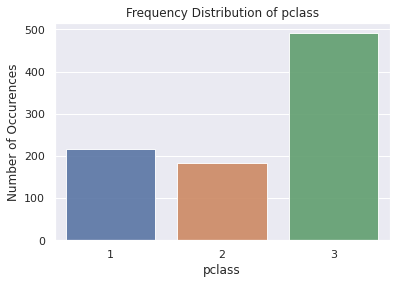

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

carrier_count = train_data['Pclass'].value_counts()
sns.set(style='darkgrid')
print(carrier_count.index)
print(carrier_count.values)
sns.barplot(carrier_count.index,carrier_count.values,alpha=0.9)
plt.title('Frequency Distribution of pclass')
plt.ylabel('Number of Occurences')
plt.xlabel('pclass')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


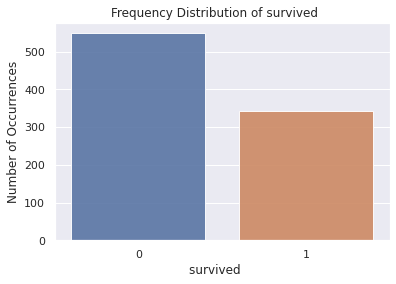

In [18]:
carrier_count = train_data["Survived"].value_counts()
sns.set(style="darkgrid")
sns.barplot(carrier_count.index, carrier_count.values, alpha=0.9)
plt.title('Frequency Distribution of survived    ')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('survived    ', fontsize=12)
plt.show()

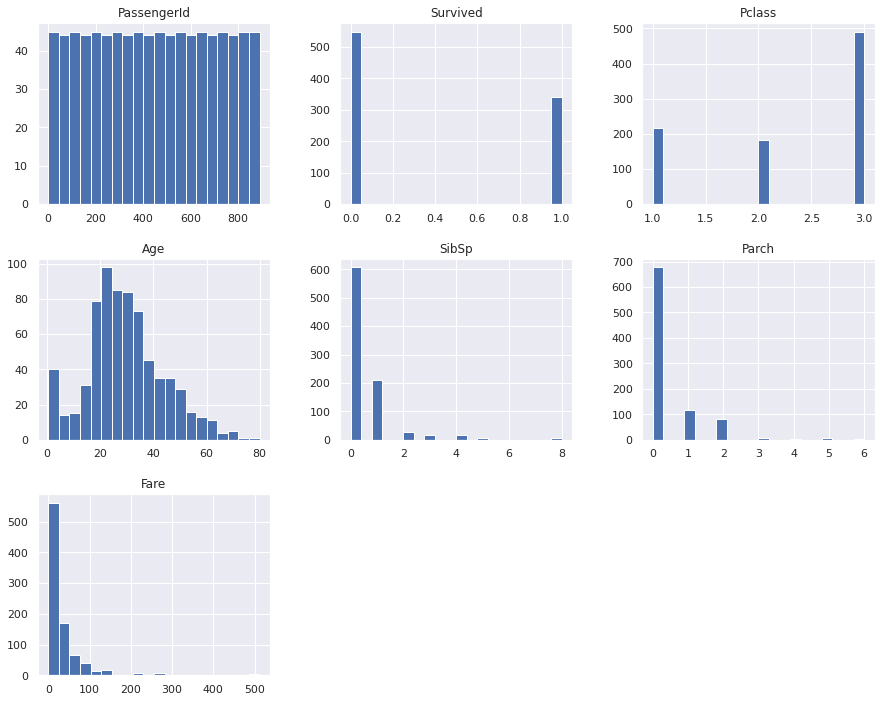

In [19]:
train_data.hist(figsize=(15,12),bins=20)
plt.title('Features Distribution')
plt.show()

In [20]:
train_data.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


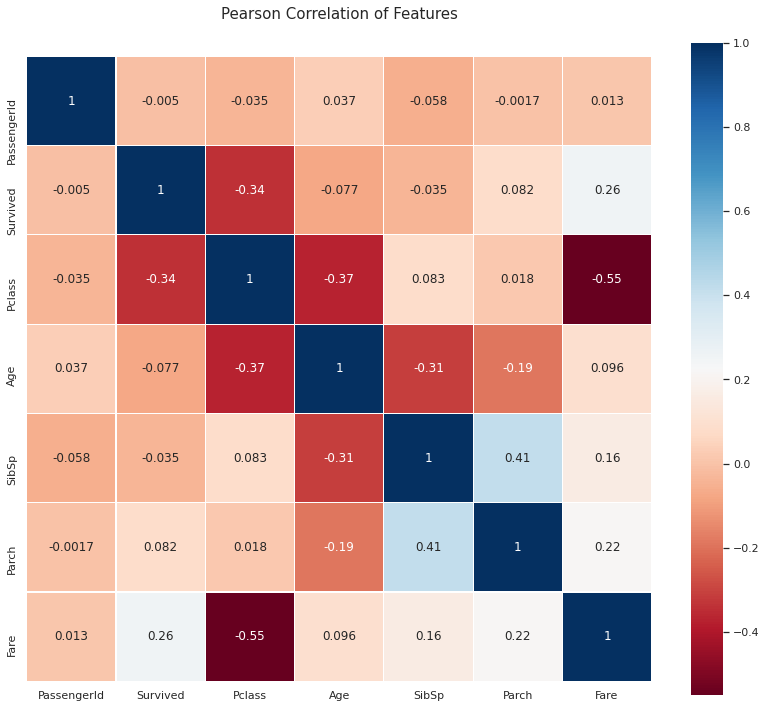

In [21]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(train_data.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [22]:
train_data[['Pclass','Survived']].groupby(['Pclass'],as_index =False).mean()




,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [23]:
train_data[['Sex','Survived']].groupby(['Sex'],as_index = False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [24]:
train_data[['SibSp','Survived']].groupby(['SibSp'],as_index = False).mean().sort_values(by='Survived',ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [25]:
train_data[['Parch','Survived']].groupby(['Parch'],as_index = False).mean().sort_values(by='Survived',ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


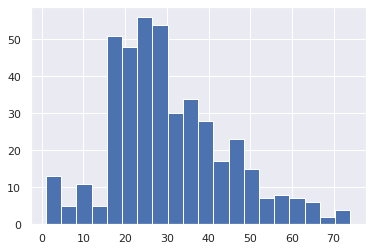

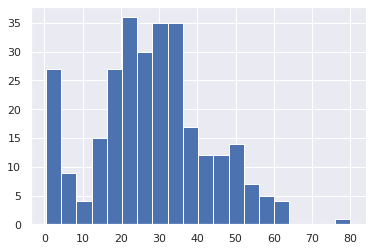

<Figure size 432x288 with 0 Axes>

In [26]:
age_survived = train_data[['Age','Survived']]
not_survivied = age_survived[age_survived['Survived'] == 0]['Age']
survived = age_survived[age_survived['Survived'] == 1]['Age']

plt.hist(not_survivied,bins=20)
plt.figure()
plt.hist(survived,bins=20)
plt.figure()
plt.show()
#As we can see that most of old age peoples not survived

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


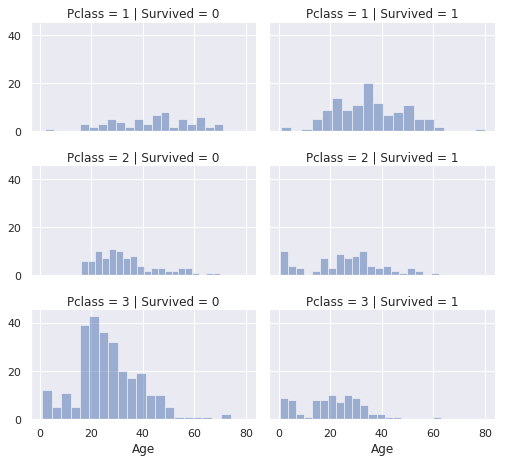

In [30]:
grid = sns.FacetGrid(train_data, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


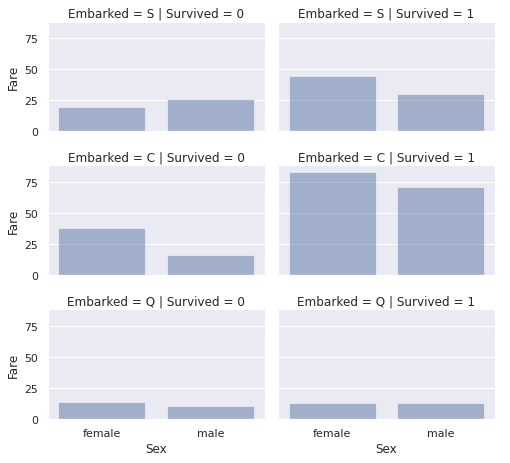

In [31]:
grid = sns.FacetGrid(train_data,row='Embarked',col='Survived',size=2.2,aspect=1.6)
grid.map(sns.barplot,'Sex','Fare',alpha=0.5,ci=None)
grid.add_legend()

In [39]:
y = train_data['Survived']
all_data = pd.concat([train_data,test_data],axis=0).reset_index(drop = True)
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [40]:
all_data = all_data.drop(['Survived','PassengerId'],axis=1)
all_data.info()
all_data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    1309 non-null   int64  
 1   Name      1309 non-null   object 
 2   Sex       1309 non-null   object 
 3   Age       1046 non-null   float64
 4   SibSp     1309 non-null   int64  
 5   Parch     1309 non-null   int64  
 6   Ticket    1309 non-null   object 
 7   Fare      1308 non-null   float64
 8   Cabin     295 non-null    object 
 9   Embarked  1307 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 102.4+ KB


(1309, 10)

In [42]:
all_data.isnull().sum().sort_values(ascending = False)

Cabin       1014
Age          263
Embarked       2
Fare           1
Ticket         0
Parch          0
SibSp          0
Sex            0
Name           0
Pclass         0
dtype: int64

In [37]:
def missing_value(df):
  number = df.isnull().sum().sort_values(ascending = False)
  number =number[number > 0]
  percentage = df.isnull().sum() * 100 / df.shape[0]
  percentage = percentage[percentage > 0].sort_values(ascending=False)
  return  pd.concat([number,percentage],keys=["Total","Percentage"],axis=1)
missing_value(all_data)

,Total,Percentage
Cabin,1014,77.463713
Age,263,20.091673
Embarked,2,0.152788
Fare,1,0.076394


In [43]:
all_data['Cabin'] = all_data['Cabin'].transform(lambda x: x.fillna(x.mode()[0]))
all_data["Embarked"] = all_data["Embarked"].transform(lambda x: x.fillna(x.mode()[0]))

In [ ]:
all_data['Age'] = all_data.loc[all_data['Age'] <= 16,'Age'] = 0
all_data['Age'] = all_data.loc[all_data['Age'] > 16,'Age'] = 1
all_data['Age'] = all_data.loc[all_data['Age'] > 32,'Age'] = 2
all_data['Age'] = all_data.loc[all_data['Age'] > 48,'Age'] = 3
all_data['Age'] = all_data.loc[all_data['Age'] > 64,'Age'] = 4


In [47]:
all_data['Fare']=all_data.loc[ all_data['Fare'] <= 7.91, 'Fare'] = 0
all_data['Fare']=all_data.loc[(all_data['Fare'] > 7.91) & (all_data['Fare'] <= 14.454), 'Fare'] = 1
all_data['Fare']=all_data.loc[(all_data['Fare'] > 14.454) & (all_data['Fare'] <= 31), 'Fare']   = 2
all_data['Fare']=all_data.loc[ all_data['Fare'] > 31, 'Fare'] = 3
all_data['Fare']=all_data['Fare'] = all_data['Fare'].astype(int)

In [48]:
missing_value(all_data)

,Total,Percentage


**Coverting the categorical features into numeric form by applying the get_dummies function**

In [49]:
all_data = pd.get_dummies(all_data).reset_index(drop=True)

In [50]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Columns: 2432 entries, Pclass to Embarked_S
dtypes: int64(5), uint8(2427)
memory usage: 3.1 MB


**Splitting all_data for train_data and test_data using y initialized to train_data['Survived']**

In [ ]:
n = len(y) # y= train_data['Survived'] 였음
train_data = all_data[:n]
test_data = all_data[n:]
